In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

############################ loading data ############################
test = pd.read_csv("test.csv")

In [2]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872749 entries, 0 to 872748
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   travel_purpose       872749 non-null  object
 1   starting_point       872749 non-null  object
 2   ending_point         872749 non-null  object
 3   transportation_mode  872749 non-null  object
 4   start_time           872749 non-null  object
 5   end_time             872749 non-null  object
 6   travel_time          872749 non-null  int64 
 7   waiting_time         872749 non-null  int64 
 8   social_class         872749 non-null  object
 9   local_size           872749 non-null  object
 10  sex                  872749 non-null  object
 11  age                  872749 non-null  object
dtypes: int64(2), object(10)
memory usage: 79.9+ MB


### the old vs others ##

In [4]:
senior_test = test[test['age'] == 'Senior']
other_test = test[test['age'] != 'Senior']

In [5]:
def undersample(df, target):
    # 获取每个类别的索引
    class_indices = [df[df[target] == label].index for label in df[target].unique()]
    undersampled_size = min(len(indices) for indices in class_indices)
    
    # 欠采样
    undersampled_indices = [indices[:undersampled_size] for indices in class_indices]
    undersampled_indices = np.concatenate(undersampled_indices)
    
    return df.loc[undersampled_indices]

In [6]:
senior_data_undersampled = undersample(senior_test, 'travel_purpose')
print("欠采样后的样本数量: ", len(senior_data_undersampled))

欠采样后的样本数量:  2960


In [7]:
other_data_undersampled = undersample(other_test, 'travel_purpose')
print("欠采样后的样本数量: ", len(other_data_undersampled))

欠采样后的样本数量:  39848


In [8]:
senior_testing = senior_data_undersampled.drop(
    [
    "travel_purpose",
    "age"
    ],
    axis = 1
)

senior_testing_numeric = pd.get_dummies(senior_testing)
senior_testing_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2960 entries, 14 to 867371
Data columns (total 59 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   travel_time                                                            2960 non-null   int64
 1   waiting_time                                                           2960 non-null   int64
 2   starting_point_Cultural Center or Leisure Area                         2960 non-null   bool 
 3   starting_point_Factory or Workshop                                     2960 non-null   bool 
 4   starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory  2960 non-null   bool 
 5   starting_point_Office                                                  2960 non-null   bool 
 6   starting_point_Other Enclosures                                        2960 non-null   bool 
 7   starting

In [9]:
other_testing = other_data_undersampled.drop(
    [
    "travel_purpose",
    "age"
    ],
    axis = 1
)

other_testing_numeric = pd.get_dummies(other_testing)
other_testing_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39848 entries, 0 to 872729
Data columns (total 63 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   travel_time                                                            39848 non-null  int64
 1   waiting_time                                                           39848 non-null  int64
 2   starting_point_Construction Site                                       39848 non-null  bool 
 3   starting_point_Cultural Center or Leisure Area                         39848 non-null  bool 
 4   starting_point_Factory or Workshop                                     39848 non-null  bool 
 5   starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory  39848 non-null  bool 
 6   starting_point_Office                                                  39848 non-null  bool 
 7   starting

In [11]:
senior_testing_final = senior_testing_numeric.drop(
    [
        "starting_point_Cultural Center or Leisure Area",
        "ending_point_Cultural Center or Leisure Area",
        "transportation_mode_Bus",
        "start_time_Afternoon",
        "end_time_Afternoon",
        "social_class_High Class",
        "local_size_Over 100000 people",
        "sex_Female"
    ],
    axis=1
    )

senior_testing_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2960 entries, 14 to 867371
Data columns (total 51 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   travel_time                                                            2960 non-null   int64
 1   waiting_time                                                           2960 non-null   int64
 2   starting_point_Factory or Workshop                                     2960 non-null   bool 
 3   starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory  2960 non-null   bool 
 4   starting_point_Office                                                  2960 non-null   bool 
 5   starting_point_Other Enclosures                                        2960 non-null   bool 
 6   starting_point_Other Services                                          2960 non-null   bool 
 7   starting

In [13]:
other_testing_final = other_testing_numeric.drop(
    [
        "starting_point_Cultural Center or Leisure Area",
        "ending_point_Cultural Center or Leisure Area",
        "transportation_mode_Bus",
        "start_time_Afternoon",
        "end_time_Afternoon",
        "social_class_High Class",
        "local_size_Over 100000 people",
        "sex_Female"
    ],
    axis=1
    )

other_testing_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39848 entries, 0 to 872729
Data columns (total 55 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   travel_time                                                            39848 non-null  int64
 1   waiting_time                                                           39848 non-null  int64
 2   starting_point_Construction Site                                       39848 non-null  bool 
 3   starting_point_Factory or Workshop                                     39848 non-null  bool 
 4   starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory  39848 non-null  bool 
 5   starting_point_Office                                                  39848 non-null  bool 
 6   starting_point_Other Enclosures                                        39848 non-null  bool 
 7   starting

In [15]:
# 将所有布尔列转换为整型
senior_testing_final_int = senior_testing_final.astype(int)

# 确认转换后的数据类型
print(senior_testing_final_int.dtypes)

travel_time                                                              int64
waiting_time                                                             int64
starting_point_Factory or Workshop                                       int64
starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory    int64
starting_point_Office                                                    int64
starting_point_Other Enclosures                                          int64
starting_point_Other Services                                            int64
starting_point_Others                                                    int64
starting_point_Public Transportation Hub or Station                      int64
starting_point_Religious Area                                            int64
starting_point_Restaurant, Bar, Cafe                                     int64
starting_point_School                                                    int64
starting_point_Shop, Market, Store, or Shopping Mall

In [16]:
# 将所有布尔列转换为整型
other_testing_final_int = other_testing_final.astype(int)

# 确认转换后的数据类型
print(other_testing_final_int.dtypes)

travel_time                                                              int64
waiting_time                                                             int64
starting_point_Construction Site                                         int64
starting_point_Factory or Workshop                                       int64
starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory    int64
starting_point_Office                                                    int64
starting_point_Other Enclosures                                          int64
starting_point_Other Services                                            int64
starting_point_Others                                                    int64
starting_point_Public Transportation Hub or Station                      int64
starting_point_Religious Area                                            int64
starting_point_Restaurant, Bar, Cafe                                     int64
starting_point_School                               

In [17]:
############################ calculating VIF #############################
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [19]:
# using VIF on the testing dataset
senior_df_predictors_selected_VIF = drop_column_using_vif_(senior_testing_final_int)

Dropping: start_time_Morning
Dropping: starting_point_Your Home
Dropping: end_time_Night


In [20]:
# using VIF on the testing dataset
other_df_predictors_selected_VIF = drop_column_using_vif_(other_testing_final_int)

Dropping: start_time_Morning
Dropping: starting_point_Your Home
Dropping: end_time_Night


Text(0.5, 1.0, 'Correlation Matrix')

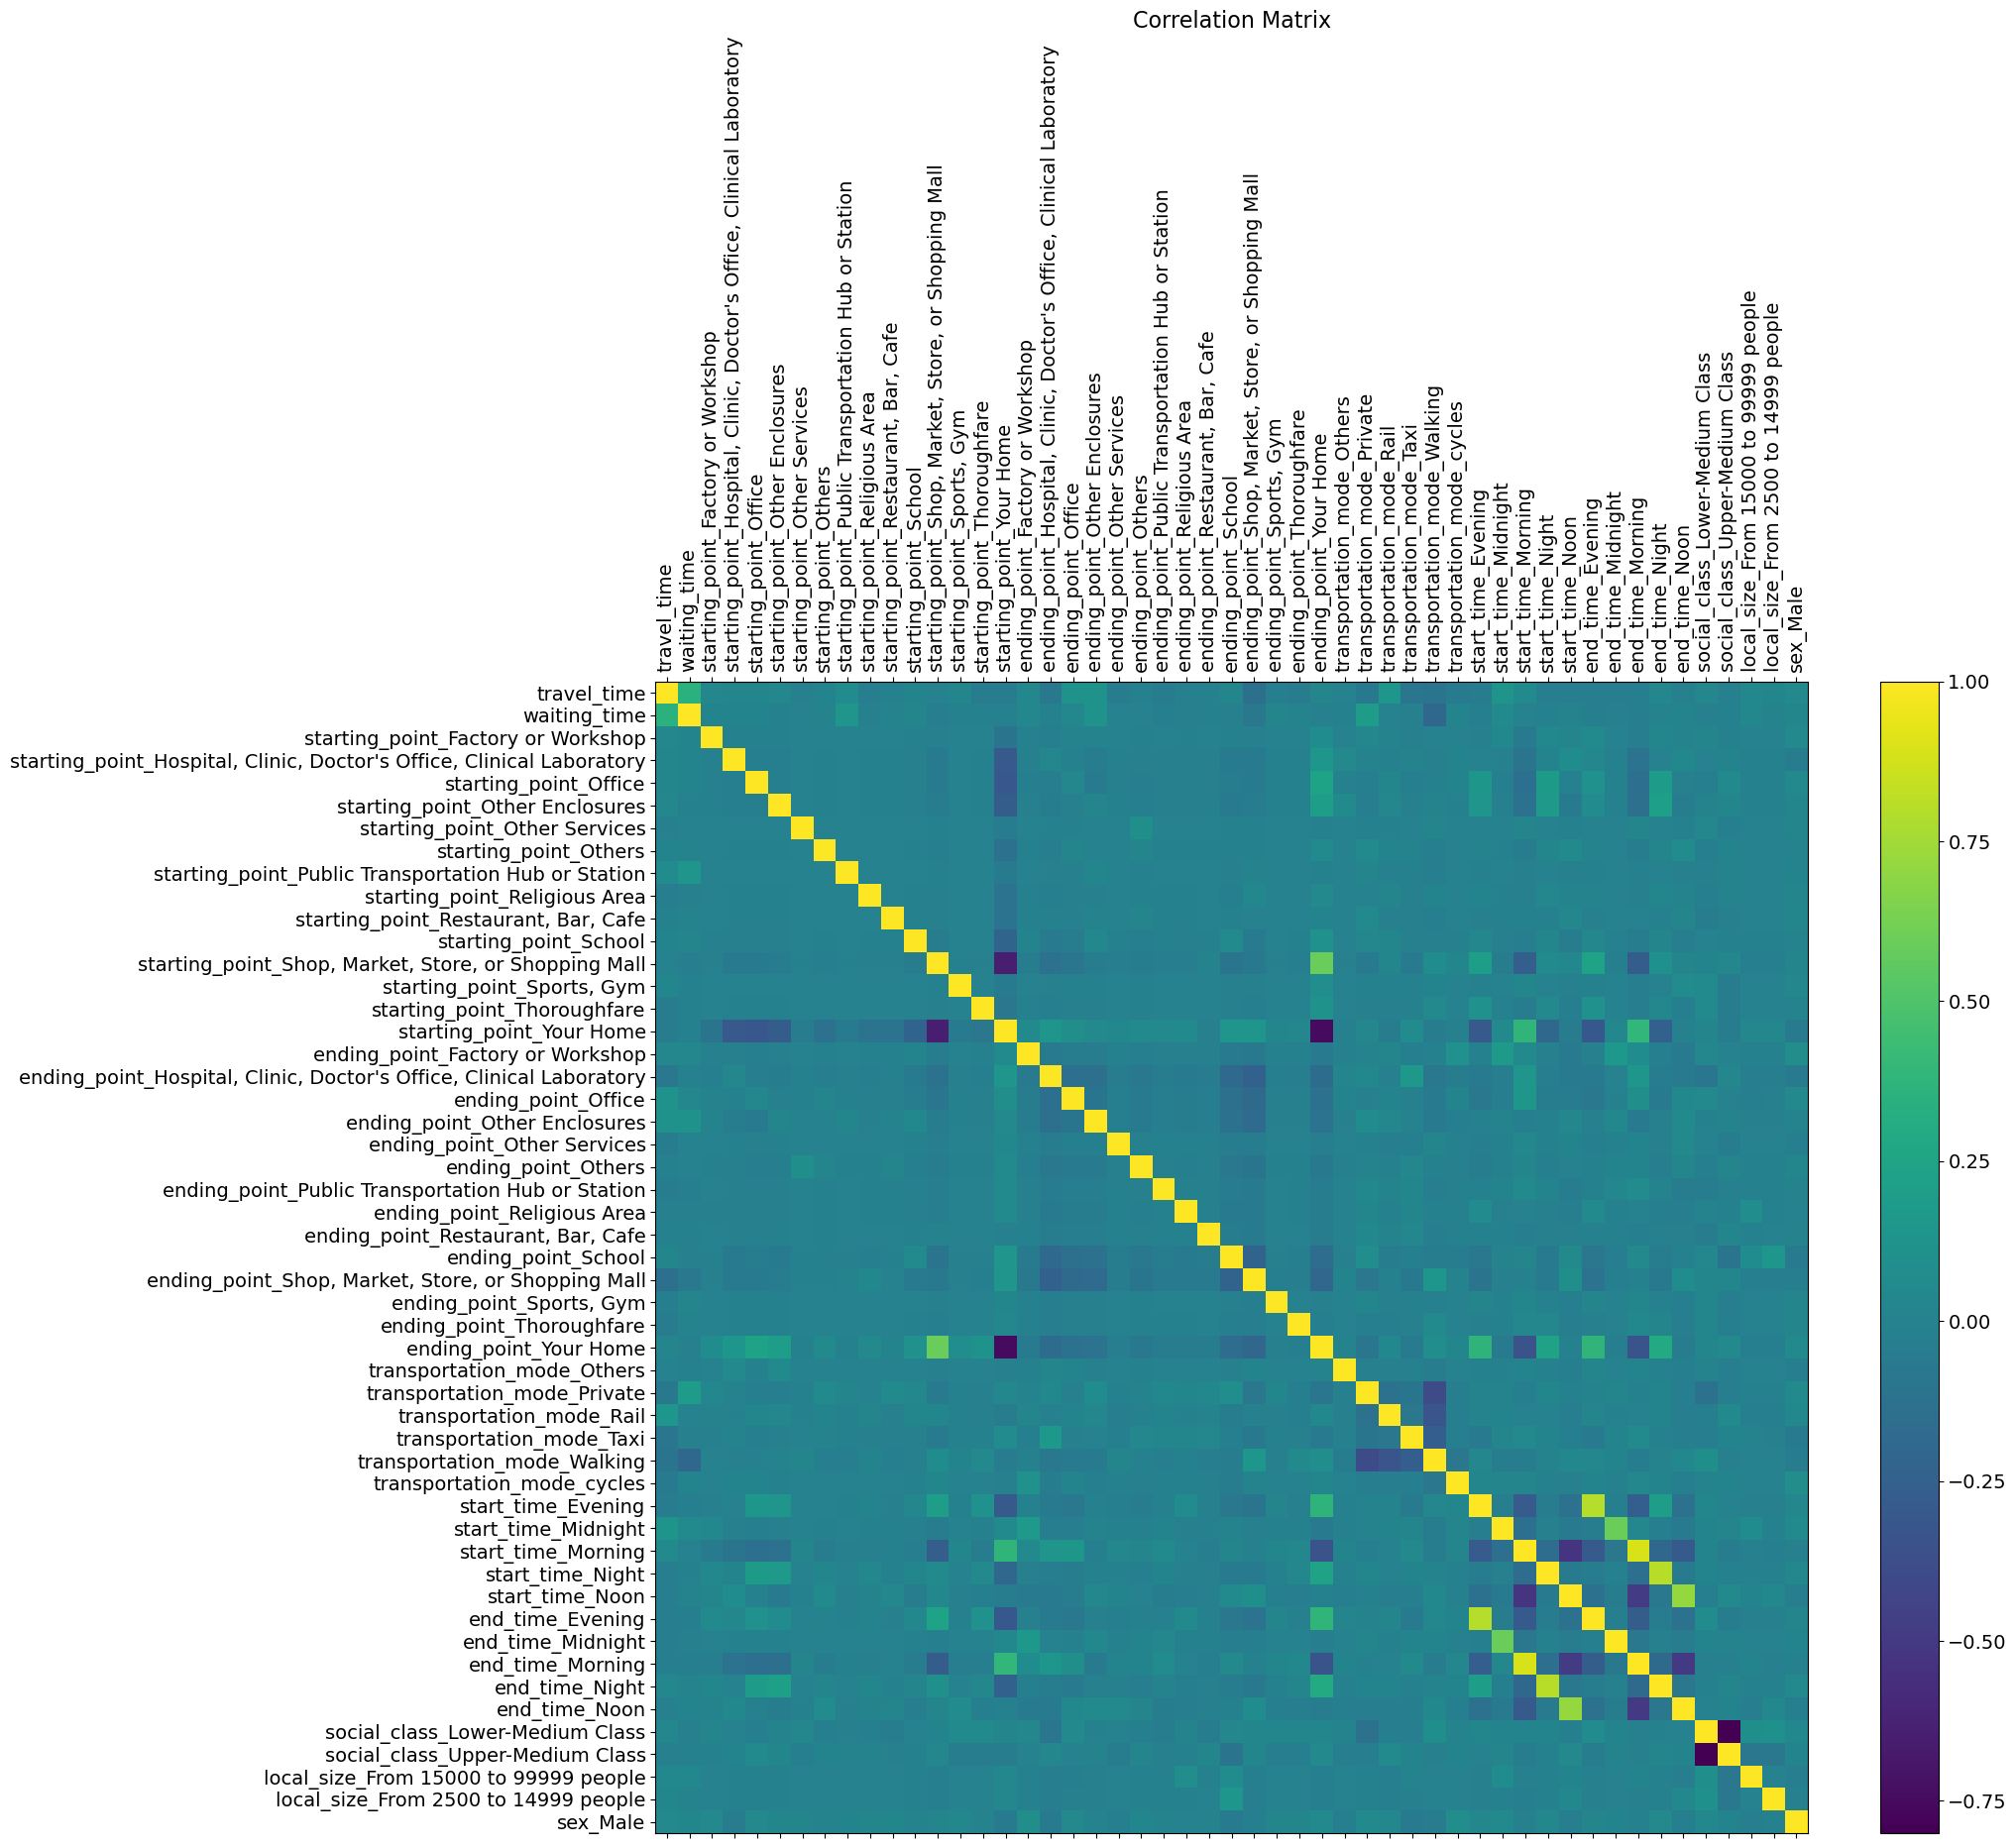

In [21]:
############# Checking the correlation between variables ##############
df = senior_testing_final_int
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.savefig('correlation_senior.png', bbox_inches='tight', dpi=300) 
plt.title('Correlation Matrix', fontsize=16)

Text(0.5, 1.0, 'female_Correlation Matrix')

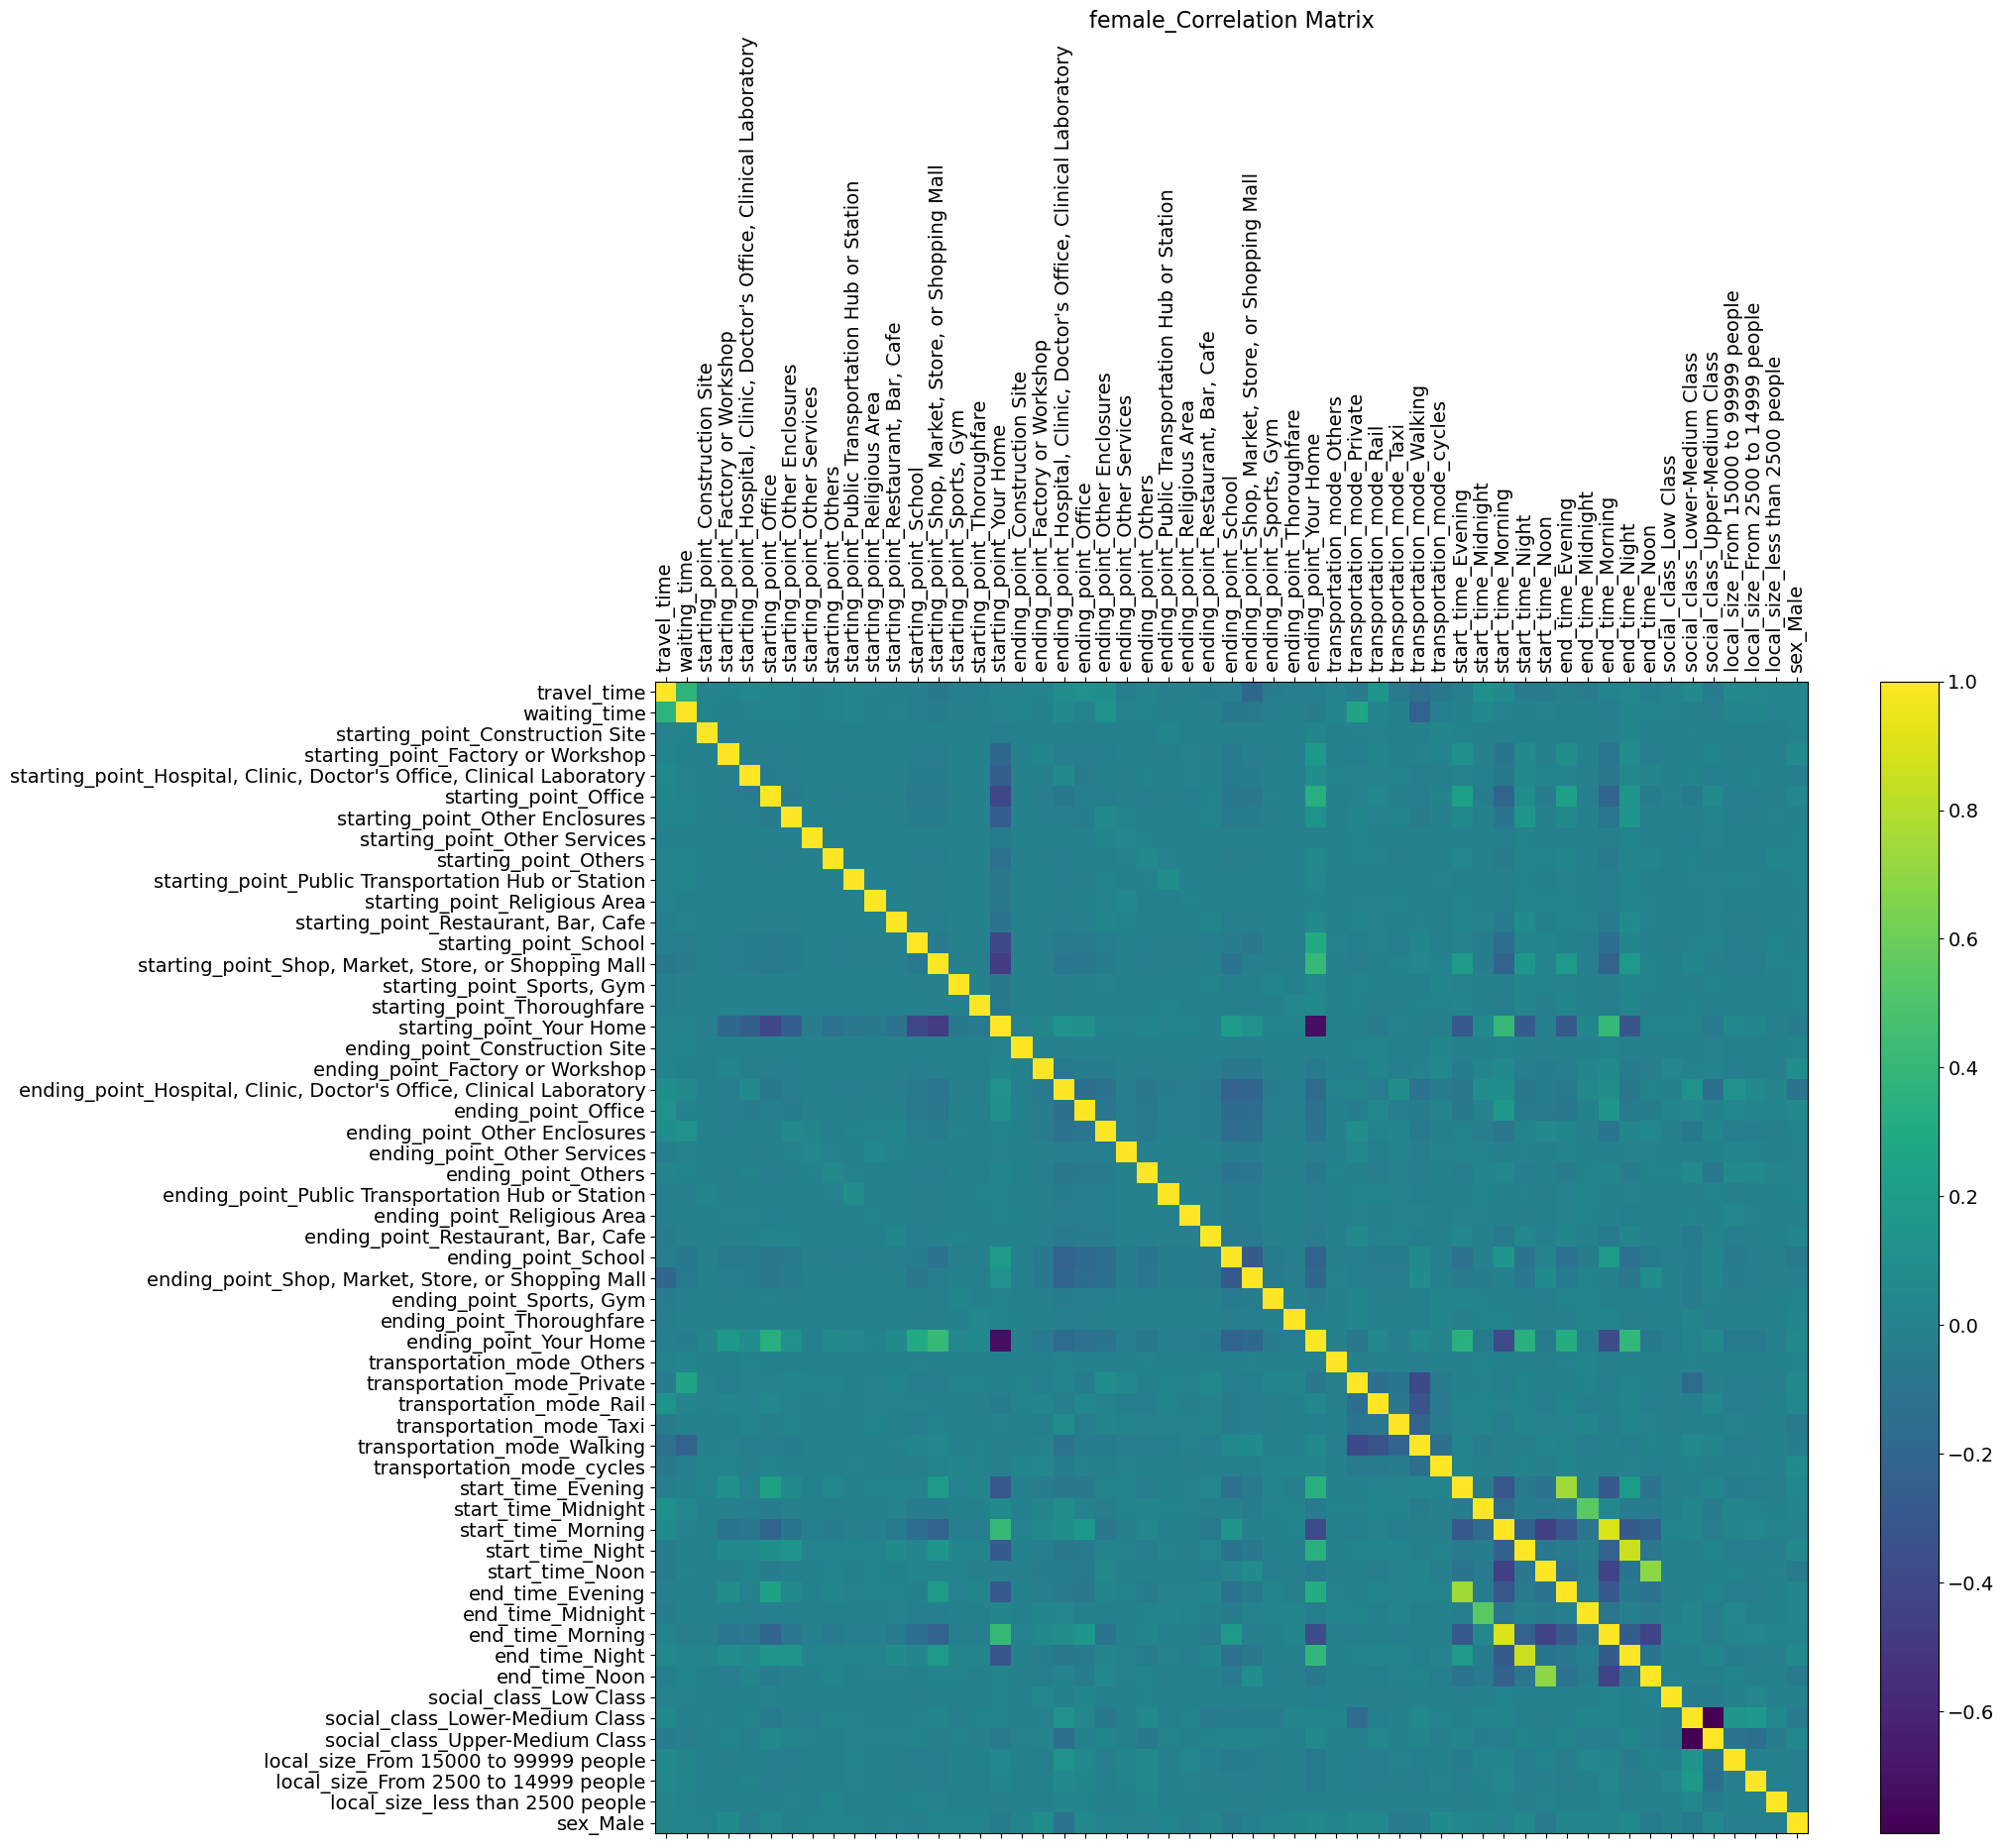

In [22]:
############# Checking the correlation between variables ##############
df = other_testing_final_int
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.savefig('correlation_other.png', bbox_inches='tight', dpi=300) 
plt.title('female_Correlation Matrix', fontsize=16)

In [24]:
senior_X = senior_df_predictors_selected_VIF
senior_y = senior_data_undersampled['travel_purpose']

In [25]:
other_X = other_df_predictors_selected_VIF
other_y = other_data_undersampled['travel_purpose']

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [27]:
def backward_elimination_multinomial(X, y, batch_size=100, significance_level=0.05):
    features = X.columns.tolist()
    
    while len(features) > 0:
        batch_features = [features[i:i + batch_size] for i in range(0, len(features), batch_size)]
        max_p_value = 0
        feature_to_remove = None
        
        for batch in batch_features:
            X_1 = sm.add_constant(X[batch])
            model = sm.MNLogit(y, X_1).fit(disp=0)  # 使用多类逻辑回归模型
            p_values = model.pvalues.iloc[1:].max(axis=1)  # 获取p值，跳过常数项
            
            if p_values.max() > max_p_value:
                max_p_value = p_values.max()
                feature_to_remove = p_values.idxmax()
        
        if max_p_value > significance_level:
            features.remove(feature_to_remove)
        else:
            break
    
    return features

In [28]:
def logistic_regression_analysis(X, y, test_size=0.3, random_state=42, batch_size=100, significance_level=0.05):
    """
    执行多元逻辑回归分析，并生成混淆矩阵和分类报告。
    
    参数:
    X (DataFrame): 包含特征的数据集
    y (Series): 目标变量
    test_size (float): 测试集大小（默认 0.3）
    random_state (int): 随机种子（默认 42）
    batch_size (int): 后向筛选的批次大小（默认 100）
    significance_level (float): 后向筛选的显著性水平（默认 0.05）
    
    返回:
    results (dict): 包含训练集和测试集准确性，混淆矩阵和分类报告的字典
    """

    # 拆分数据集为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # 执行后向筛选
    selected_features = backward_elimination_multinomial(X_train, y_train, batch_size=batch_size, significance_level=significance_level)
    print("Selected features after backward elimination:", selected_features)

    # 使用筛选后的特征集
    X_train_final = X_train[selected_features]
    X_test_final = X_test[selected_features]
    
    # 初始化并训练逻辑回归模型
    model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
    model.fit(X_train_final, y_train)

    # 预测
    y_train_pred = model.predict(X_train_final)
    y_test_pred = model.predict(X_test_final)
    
    # 计算准确性
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # 混淆矩阵
    cm = confusion_matrix(y_test, y_test_pred)
    
    # 打印分类报告
    report = classification_report(y_test, y_test_pred)
    
    # 可视化混淆矩阵
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # 打印结果
    print("Training Accuracy: {:.4f}".format(train_accuracy))
    print("Test Accuracy: {:.4f}".format(test_accuracy))
    print("Classification Report:\n", report)

/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid valu

Selected features after backward elimination: ['travel_time', 'waiting_time', 'starting_point_Factory or Workshop', "starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory", 'starting_point_Office', 'starting_point_Other Enclosures', 'starting_point_Other Services', 'starting_point_Others', 'starting_point_Public Transportation Hub or Station', 'starting_point_Religious Area', 'starting_point_Restaurant, Bar, Cafe', 'starting_point_School', 'starting_point_Shop, Market, Store, or Shopping Mall', 'starting_point_Sports, Gym', 'starting_point_Thoroughfare', 'ending_point_Factory or Workshop', "ending_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory", 'ending_point_Office', 'ending_point_Other Enclosures', 'ending_point_Other Services', 'ending_point_Others', 'ending_point_Public Transportation Hub or Station', 'ending_point_Religious Area', 'ending_point_Restaurant, Bar, Cafe', 'ending_point_School', 'ending_point_Shop, Market, Store, or Shopping Mall', 'ending

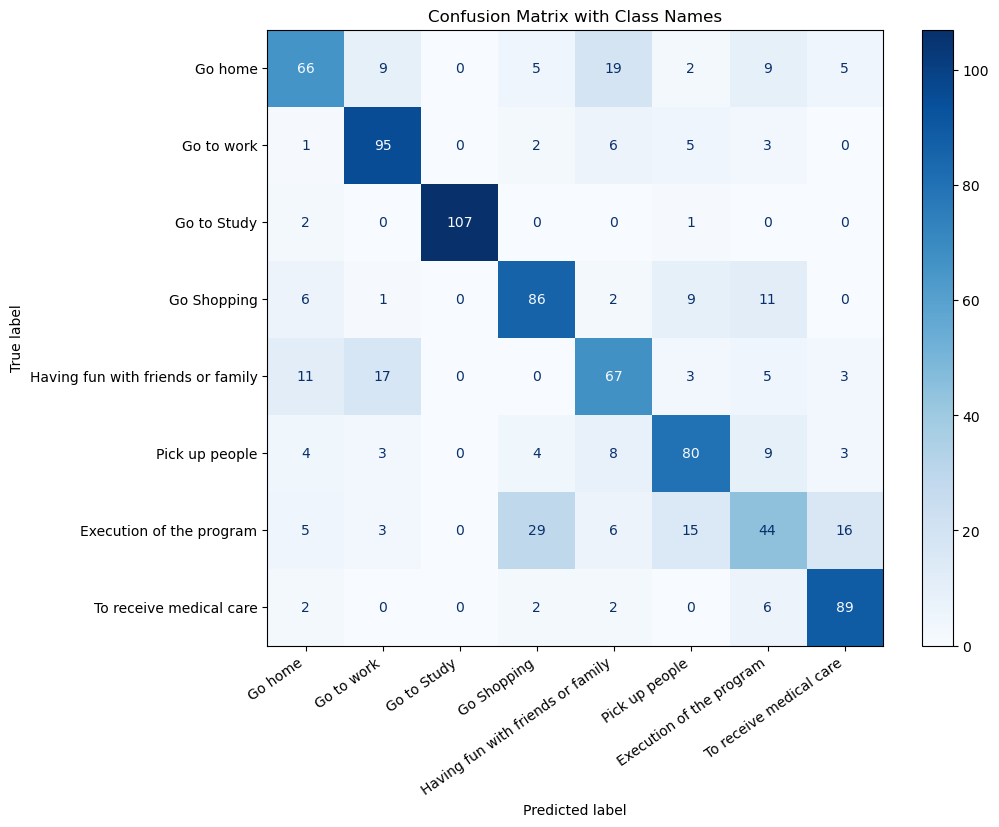

Training Accuracy: 0.8470
Test Accuracy: 0.7140
Classification Report:
                                    precision    recall  f1-score   support

         Execution of the program       0.68      0.57      0.62       115
                      Go Shopping       0.74      0.85      0.79       112
                          Go home       1.00      0.97      0.99       110
                      Go to study       0.67      0.75      0.71       115
                       Go to work       0.61      0.63      0.62       106
Having fun with friends or family       0.70      0.72      0.71       111
                   Pick up people       0.51      0.37      0.43       118
          To receive medical care       0.77      0.88      0.82       101

                         accuracy                           0.71       888
                        macro avg       0.71      0.72      0.71       888
                     weighted avg       0.71      0.71      0.71       888



In [31]:
senior_results = logistic_regression_analysis(senior_X, senior_y)

/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid valu

Selected features after backward elimination: ['travel_time', 'waiting_time', 'starting_point_Construction Site', 'starting_point_Factory or Workshop', "starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory", 'starting_point_Office', 'starting_point_Other Enclosures', 'starting_point_Other Services', 'starting_point_Others', 'starting_point_Public Transportation Hub or Station', 'starting_point_Religious Area', 'starting_point_Restaurant, Bar, Cafe', 'starting_point_School', 'starting_point_Shop, Market, Store, or Shopping Mall', 'starting_point_Sports, Gym', 'starting_point_Thoroughfare', 'ending_point_Construction Site', 'ending_point_Factory or Workshop', "ending_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory", 'ending_point_Office', 'ending_point_Other Enclosures', 'ending_point_Other Services', 'ending_point_Others', 'ending_point_Public Transportation Hub or Station', 'ending_point_Religious Area', 'ending_point_Restaurant, Bar, Cafe', 'ending_point_

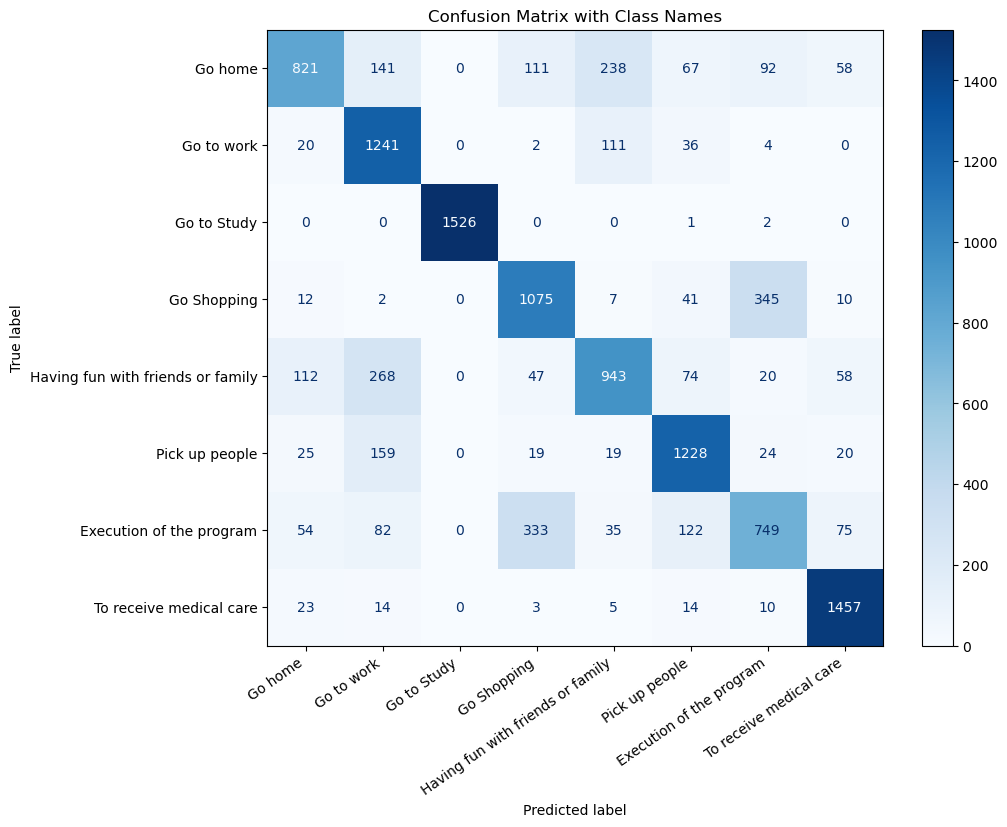

Training Accuracy: 0.7792
Test Accuracy: 0.7562
Classification Report:
                                    precision    recall  f1-score   support

         Execution of the program       0.77      0.54      0.63      1528
                      Go Shopping       0.65      0.88      0.75      1414
                          Go home       1.00      1.00      1.00      1529
                      Go to study       0.68      0.72      0.70      1492
                       Go to work       0.69      0.62      0.65      1522
Having fun with friends or family       0.78      0.82      0.80      1494
                   Pick up people       0.60      0.52      0.56      1450
          To receive medical care       0.87      0.95      0.91      1526

                         accuracy                           0.76     11955
                        macro avg       0.75      0.76      0.75     11955
                     weighted avg       0.76      0.76      0.75     11955



In [32]:
other_results = logistic_regression_analysis(other_X, other_y)